In [250]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
#Question 1 Part 1 
#This part is very long so just look for the graddescent2 function with the comment below saying Question 1 Part 2

In [251]:
DF = pd.read_csv("Real Estate.csv")

In [252]:
DF.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [253]:
names = DF.columns
valuelist = []
for i in names:
    valuelist.append(DF[i])
print(valuelist)

[0        1
1        2
2        3
3        4
4        5
      ... 
409    410
410    411
411    412
412    413
413    414
Name: No, Length: 414, dtype: int64, 0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: X1 transaction date, Length: 414, dtype: float64, 0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64, 0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64, 0      10
1       9
2       5
3       5
4       5
       ..
409     0
410     9
411     7
412     5
413     9
Name: X4 number of convenience stores, Length

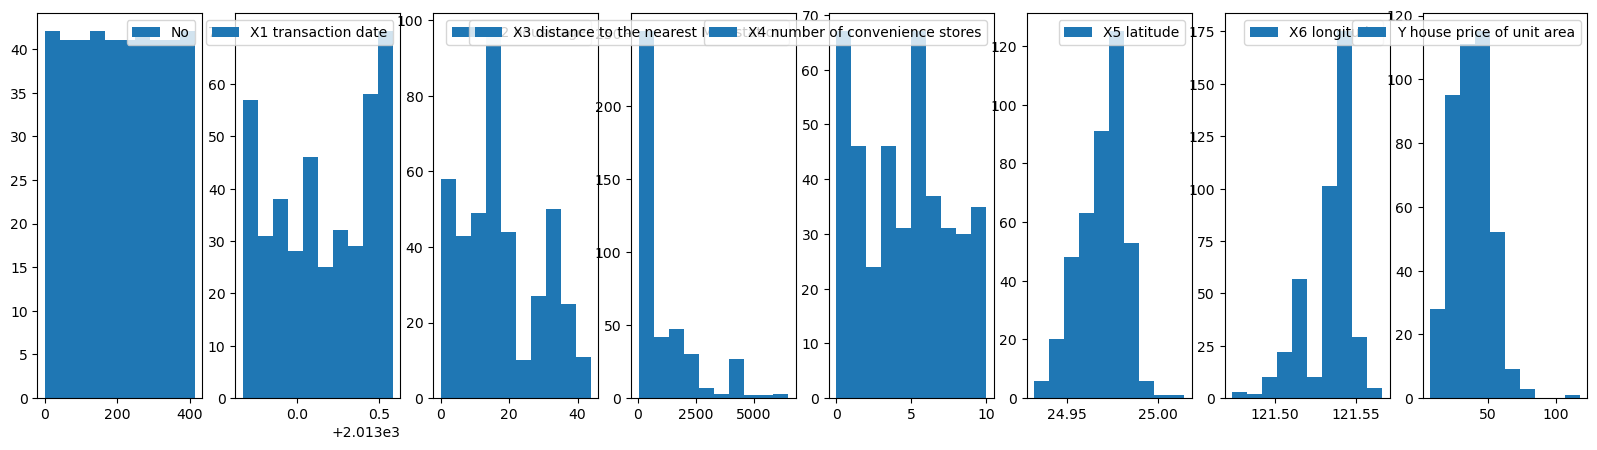

In [254]:
#graph all the data
fig, (a1,a2,a3,a4,a5,a6,a7,a8) = plt.subplots(1, 8,figsize=(20,5))
for i,x,index,name in zip([a1,a2,a3,a4,a5,a6,a7,a8], valuelist,range(8),names):
    i.hist(x,label=name)
    i.legend()
plt.show()

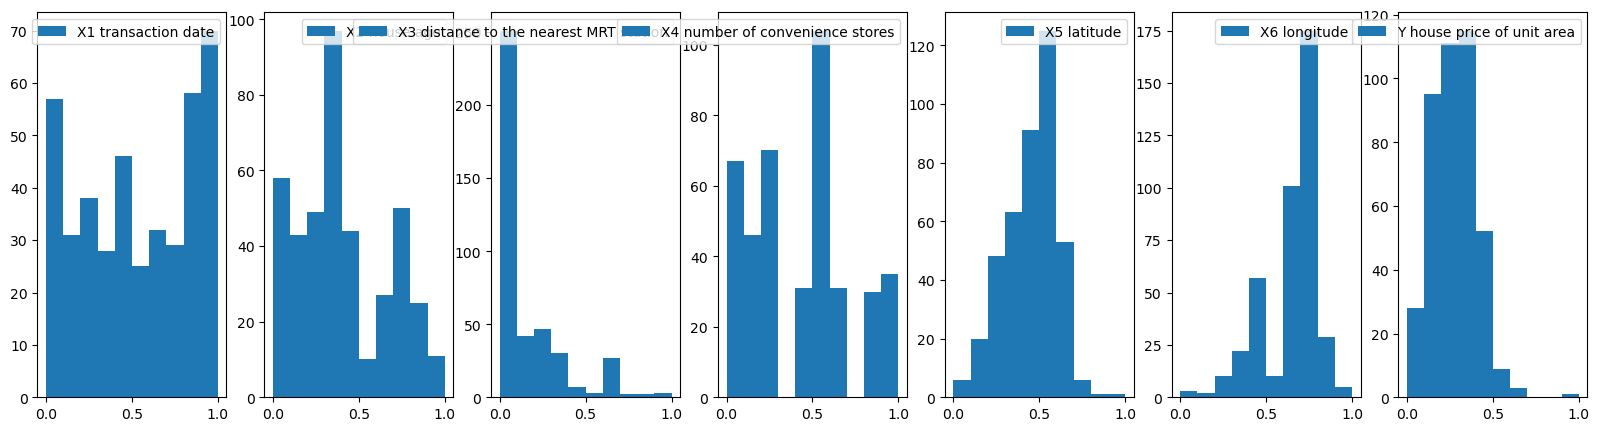

In [255]:
#normalize all the data
normal_valuelist = []

for i in valuelist[1:]:
    a_max, a_min = i.max(), i.min()
    normal_valuelist.append((i-a_min)/(a_max-a_min))
fig, (b2,b3,b4,b5,b6,b7,b8) = plt.subplots(1, 7,figsize=(20,5))
for i,x,index,name in zip([b2,b3,b4,b5,b6,b7,b8], normal_valuelist,range(7),names[1:]):
    i.hist(x,label=name)
    i.legend()
plt.show()

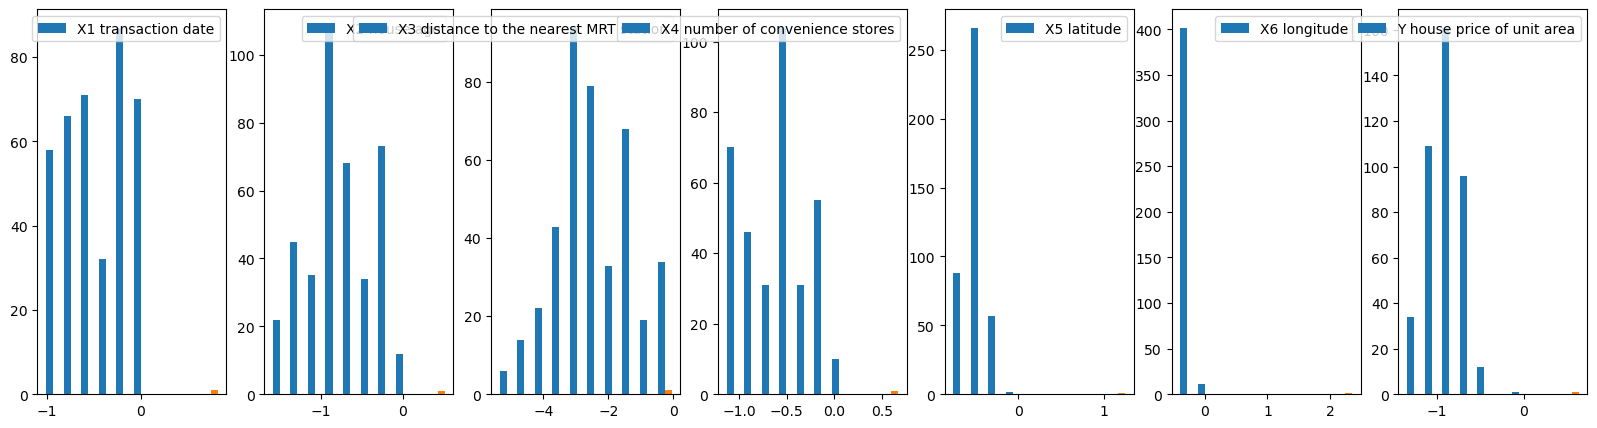

In [256]:
#correct for skewness using boxcox
boxcox_valuelist = []
for i,j in zip(normal_valuelist, range(7)):
    boxcox_valuelist.append(stats.boxcox([k for k in i if k!=0]))
fig, (c2,c3,c4,c5,c6,c7,c8) = plt.subplots(1, 7,figsize=(20,5))
for i,x,index,name in zip([c2,c3,c4,c5,c6,c7,c8], boxcox_valuelist,range(7),names[1:]):
    i.hist(x,label=name)
    i.legend()
plt.show()

In [257]:
#split up the training data
col = DF.columns
for c in col:
    DF[c] = (DF[c]-DF[c].min())/(DF[c].max()-DF[c].min())
training_dataset = DF.sample(frac = 0.70)
training_Y = training_dataset["Y house price of unit area"]
del training_dataset["Y house price of unit area"]
del training_dataset["No"]
training_dataset.insert(0, "X0", 1, True)
test_dataset = DF.drop(training_dataset.index)
test_Y = test_dataset["Y house price of unit area"]
del test_dataset["Y house price of unit area"]
del test_dataset["No"]
test_dataset.insert(0, "X0", 1, True)

In [258]:
#correlations
corr_matrix = DF.corr()
print(corr_matrix["Y house price of unit area"])

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64


X0                                       -0.192413
X1 transaction date                       0.056445
X2 house age                             -0.130329
X3 distance to the nearest MRT station    0.235330
X4 number of convenience stores           0.179021
X5 latitude                               0.405977
X6 longitude                              0.320740
dtype: float64


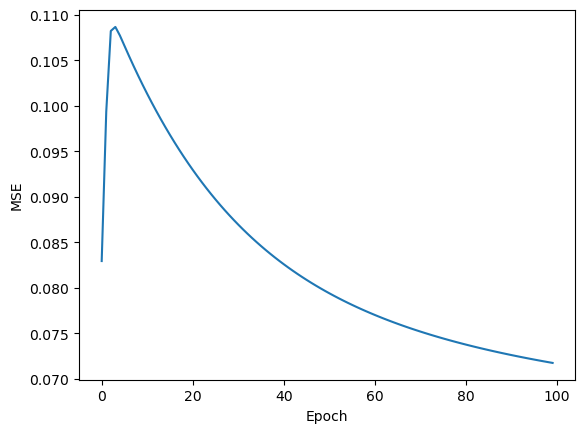

In [259]:
#Question 1 Part 2
def graddescent2(X,Y, learning_rate, lambdas, epoch,batch_size):
    w = np.ones(X.shape[1])
    MSE_list = []
    for ep in range(epoch):
        Ridges = np.ones(X.shape[1])
        for i in range(0, X.shape[0],batch_size):
            batchX = X.iloc[i:(i+batch_size+1)]
            intermediate = (np.matmul(batchX,w) - Y.iloc[i:(i+batch_size+1)])
            MSE = 1*(np.matmul(intermediate.T,intermediate))/(batch_size)
            Ridge_MSE = MSE + lambdas*(np.matmul(w.T,w))
            grad = 2*(np.matmul(batchX.T, intermediate))/(batch_size)
            Ridge_grad = grad + 2*lambdas*w
            Ridges = Ridge_MSE
            w = w - learning_rate*(Ridge_grad)
        MSE_list.append(Ridges)
    return w, MSE_list
theta, MSE_lists = graddescent2(training_dataset,training_Y,0.01, 0.001, 100, 8)
plt.plot(np.arange(100),MSE_lists)
plt.ylabel("MSE")
plt.xlabel("Epoch")
print(theta)




In [260]:
# Question 1 Part 3
np.matmul(test_dataset,theta)
#These are the predictions for the label of price of real estate after standarization

1      0.402064
2      0.449486
5      0.205821
8      0.113397
9      0.234619
         ...   
401    0.229968
406    0.402559
409    0.086449
410    0.402999
411    0.387683
Length: 124, dtype: float64

In [261]:
#Question 1 Part 4
batchX = test_dataset
intermediate = (np.matmul(batchX,theta) - test_Y)
MSE1 = (np.matmul(intermediate.T,intermediate))/(batchX.shape[0])
print(MSE1)
#This is a very low MSE

0.007083306434362197


In [264]:
#Question 2 Part 1
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(training_dataset,training_Y)
print(f'Linear Regression, intercept={round(lr.intercept_,2)}, coefficients={lr.coef_}, rmse={mean_squared_error(training_Y,lr.predict(training_dataset))}')
RMSE = math.sqrt(MSE1)
print("RMSE of my mini-batch gradient descent function: ",RMSE)
print(test_Y)
#Question 2 Part 2
prediction = lr.predict(test_dataset)
print(prediction)
#Question 2 Part 3
#My RMSE value is a good bit higher than the sklearn RMSE.
#I think that sklearn model might be predicting the values better, since it may have accounted better for standarizations and 
#removal of possible outliers, but all in all I think that my graddescent function works pretty well


Linear Regression, intercept=0.29, coefficients=[ 0.          0.04373206 -0.12874414 -0.30790209  0.1085874   0.11789047
 -0.04412134], rmse=0.006999612908434421
RMSE of my mini-batch gradient descent function:  0.08416238134916453
1      0.314832
2      0.361237
5      0.222930
8      0.101911
9      0.131938
         ...   
401    0.182894
406    0.299363
409    0.070974
410    0.385805
411    0.300273
Name: Y house price of unit area, Length: 124, dtype: float64
[0.36581659 0.36831679 0.22431564 0.00713765 0.25202283 0.26076489
 0.2635802  0.37092464 0.19177553 0.21467187 0.34536532 0.08855669
 0.28679979 0.26273412 0.24319497 0.23171644 0.31948858 0.31725945
 0.21961313 0.27757706 0.34030661 0.39454922 0.22608288 0.09222537
 0.19157162 0.15131972 0.35671305 0.42819385 0.32842939 0.27824841
 0.31896713 0.27103376 0.3600878  0.3230169  0.36358727 0.23903764
 0.379383   0.29688992 0.36049496 0.26447888 0.30032144 0.30248951
 0.33803332 0.31371857 0.29825734 0.34779586 0.30709389 0.055